--------------------------------------------------------------------------------------------------------------------------------
# Data Missingness

--------------------------------------------------------------------------------------------------------------------------------
#### Things you would learn:

    Generating random integers using numpy

    Generating basic statistics of data

    Reindexing in dataframes

    Using isnull,notnull to check the missing values

##### URL's 

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html


##### Duration of excercise : 15min - 30min

--------------------------------------------------------------------------------------------------------------------------------

### Summarizing Statistics

In [1]:
# Importing libraries pandas and numpy 
import pandas as pd 
import numpy as np


In [2]:
# Generating random values with use of randint of numpy

values1 = np.random.randint(500,size=10000) # This is generating an ndarray of 10000 random integers between [0-500).
values2 = pd.Series(np.random.randint(500,size=10000)) # This is generating a pd series of 10000 random integers between [0,500).


In [3]:
#Displaying the Values1
values1[:10]


array([206, 265,  84,  95, 221, 440, 324, 225, 277, 422])

In [4]:
#Displaying the Values2 
values2[:10]

0    421
1    203
2    122
3    441
4    191
5    227
6    463
7    138
8    259
9    185
dtype: int32

In [5]:
# Printing the basic Statistics functions.

print('MIN(values1)= '+str(values1.min())+'\t\t\tMIN(values2)= ' +str(values2.min())) # Printing the Min Value in both the value tables
print('MAX(values1)= '+str(values1.max())+'\t\t\tMAX(values2)= ' +str(values2.max())) # Printing the Max values in both the value tables
print('Range(values1)= '+str(values1.ptp())+'\t\t\tRange(values2)= ' +str(values2.ptp())) #Printing the Range of both the value tables
print('Mean(values1)= '+str(values1.mean())+'\t\t\tMean(values2)= ' +str(values2.mean())) # Priinting the Mean of both the value table
print('StDev(values1)= '+str(values1.std())+'\t\t\tStDev(values2)= ' +str(values2.std())) # Printing the STDev of both the value table
print('Variance(values1)= '+str(values1.var())+'\t\t\tVariance(values2)= ' +str(values2.var())) # Printing the variance of both the value table

MIN(values1)= 0			MIN(values2)= 0
MAX(values1)= 499			MAX(values2)= 499
Range(values1)= 499			Range(values2)= 499
Mean(values1)= 246.2425			Mean(values2)= 245.6611
StDev(values1)= 143.428734547			StDev(values2)= 145.60999716337219
Variance(values1)= 20571.8018937			Variance(values2)= 21202.271273917253


In [6]:
# Pandas has the descirbe feature which would display the basic statistics of the given series
values2.describe()

count    10000.000000
mean       245.661100
std        145.609997
min          0.000000
25%        117.750000
50%        246.000000
75%        372.000000
max        499.000000
dtype: float64

In [7]:
# Trying the describe function with non numeric series objects.
nonnumeric = pd.Series(['a', 'a', 'b', 'b', 'a', 'a', np.nan, 'c', 'd', 'a'])
nonnumeric.describe() # Here they display the no of unique obbjects, top object,Frequently occured object count


count     9
unique    4
top       a
freq      5
dtype: object

### Missing Values

In [8]:
# Creating a dataframe with random numbers ( 5rows, 3 columns)

df= pd.DataFrame(np.random.randn(5,3),index=['a','c','e','f','h'],columns=['one','two','three']) #randn return standard normal distribution no's
df

one       two     three
a -0.360909 -1.052092  0.118894
c -2.224958 -0.391038  0.708246
e -0.241618 -1.184733 -1.191130
f -0.356055 -0.817825 -0.726391
h -1.797607 -0.523551  0.229973

In [9]:
# Adding two more columns to the existing DF
df['four']=['bar','barr','barrr','barrrr','barrrrr']
df['five']=df['one']>0 # Trying to display the boolean value for this row which should have value greater than 0
df

one       two     three     four   five
a -0.360909 -1.052092  0.118894      bar  False
c -2.224958 -0.391038  0.708246     barr  False
e -0.241618 -1.184733 -1.191130    barrr  False
f -0.356055 -0.817825 -0.726391   barrrr  False
h -1.797607 -0.523551  0.229973  barrrrr  False

In [10]:
# Reindexing the previous DF , henceforth adding empty rows
df2= df.reindex(['a','b','c','d','e','f','g','h'])
df2  # This DF now has empty rows added and the previous DF data

one       two     three     four   five
a -0.360909 -1.052092  0.118894      bar  False
b       NaN       NaN       NaN      NaN    NaN
c -2.224958 -0.391038  0.708246     barr  False
d       NaN       NaN       NaN      NaN    NaN
e -0.241618 -1.184733 -1.191130    barrr  False
f -0.356055 -0.817825 -0.726391   barrrr  False
g       NaN       NaN       NaN      NaN    NaN
h -1.797607 -0.523551  0.229973  barrrrr  False

In [11]:
# Trying to change the index to a row
df2.ix['a'] #Displaying the elements of the row a with their respective column names


C:\Users\MosesAbishekRaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


one     -0.360909
two      -1.05209
three    0.118894
four          bar
five        False
Name: a, dtype: object

In [12]:
# Trying to identify the null values in a column

pd.isnull(df2['three']) # Using the 'isnull' keyword in pandas to identify the null values

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: three, dtype: bool

In [13]:
# Trying to identify the null values in a column

pd.notnull(df2['one']) # Also we can use the notnull to identify the values which are not null in a given column

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool

In [14]:
b= df[['one','two','three']]
b

one       two     three
a -0.360909 -1.052092  0.118894
c -2.224958 -0.391038  0.708246
e -0.241618 -1.184733 -1.191130
f -0.356055 -0.817825 -0.726391
h -1.797607 -0.523551  0.229973

In [15]:
# Creating a DF where  has the df columns one and two
a = df[['one','two']]
a['one']['a':'e']= float('nan') # Making the values from a:e in the column 'one' to nan
a

C:\Users\MosesAbishekRaj\Anaconda3\lib\site-packages\pandas\core\series.py:767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_with(key, value)
C:\Users\MosesAbishekRaj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


one       two
a       NaN -1.052092
c       NaN -0.391038
e       NaN -1.184733
f -0.356055 -0.817825
h -1.797607 -0.523551

In [16]:
#Addition of the two DFs consisting of NAN values
a+b  # Here the nan values are considered as zero when added 

one  three       two
a       NaN    NaN -2.104184
c       NaN    NaN -0.782076
e       NaN    NaN -2.369467
f -0.712110    NaN -1.635651
h -3.595214    NaN -1.047101

In [17]:
#Trying the mean function on the column 1
a.mean(1) 

a   -1.052092
c   -0.391038
e   -1.184733
f   -0.586940
h   -1.160579
dtype: float64

In [18]:
#Trying the sum of the specific column objects
a['one'].sum()

-2.1536619060694338

### Histograms

<IPython.core.display.Javascript object>


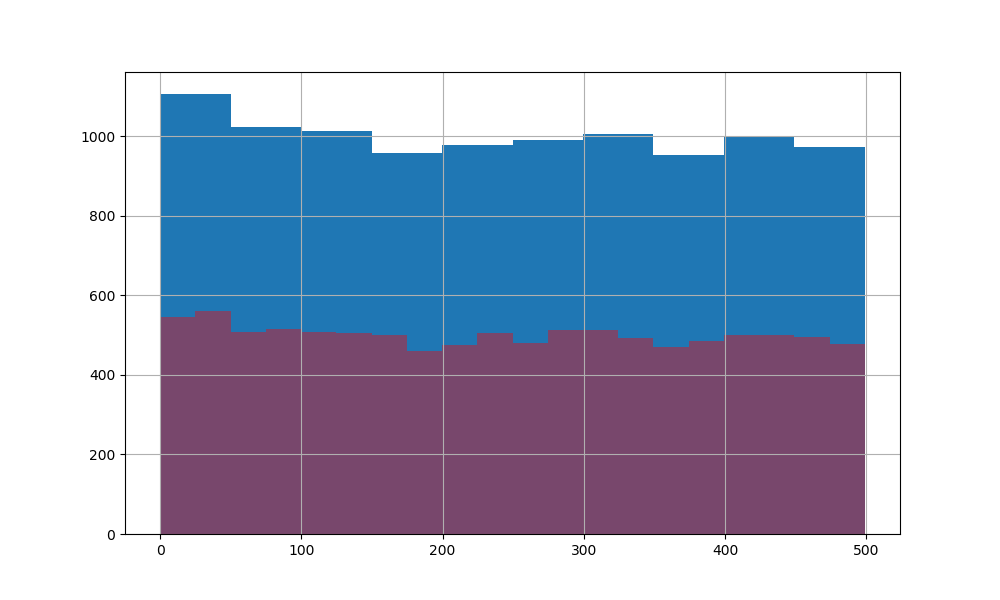

In [19]:
%matplotlib notebook
pdhist = values2.hist()
pdhist

<IPython.core.display.Javascript object>


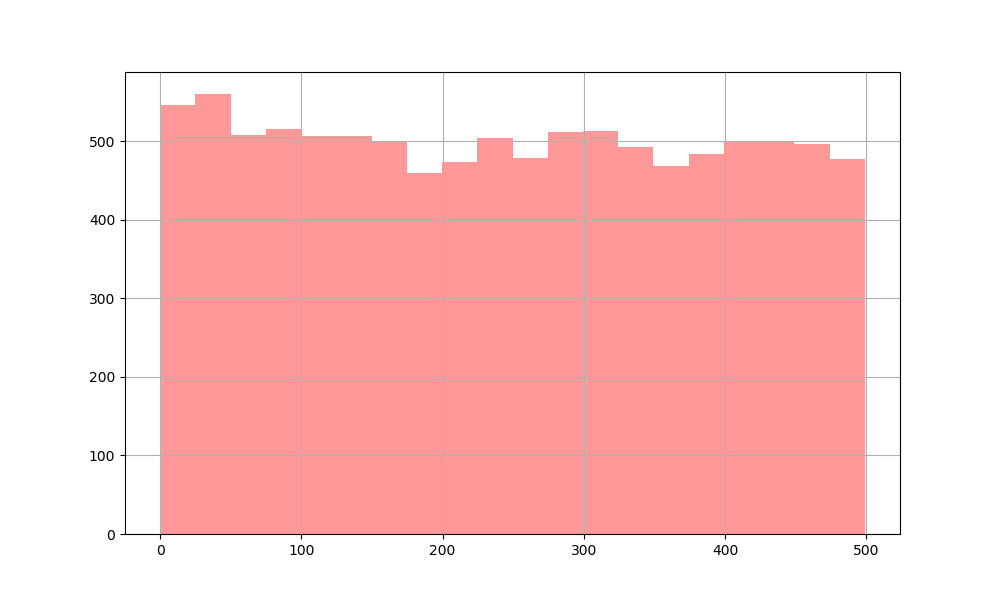

In [21]:
%matplotlib notebook
pdhist2 = values2.hist(bins=20, color='r',alpha=0.4, figsize=(10,6))
pdhist2